# RSF AGENCY SKILL TEST

## Section 2: Boost & Promotional Impact Analysis

*data source:* https://raw.githubusercontent.com/ringoquimico/Proyectos/refs/heads/main/AM3%20TEST/01_test_B/00_data_sources/model_performance_on_boost.csv


### 1. LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from IPython.display import display, HTML
import warnings

#ignore warnings
warnings.filterwarnings('ignore')


### 2. DATA SOURCE

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ringoquimico/Proyectos/refs/heads/main/AM3%20TEST/01_test_B/00_data_sources/model_performance_on_boost.csv", sep=';', thousands=',', decimal='.')
df.head()

,MODEL,Agency,BOOST COUNT,TOTAL COUNT OF SUBSCRIBER,AVE SUBS COUNT,REVENUE,$ per fan
0,Model 1,N,7,1374,229,"$4,436.59",$3.23
1,Model 2,N,8,1761,252,"$4,759.58",$2.70
2,Model 3,N,7,1870,312,"$4,535.25",$2.43
3,Model 4,N,7,1132,189,"$1,569.37",$1.39
4,Model 5,R,8,3456,432,"$18,017.59",$5.21


### 3. DATA CLEANING

In [11]:

#Transform 'REVENUE' column to numeric
df['REVENUE'] = df['REVENUE'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['REVENUE'] = df['REVENUE'].fillna(0)

#Transform '$ per fan' column to numeric
df['$ per fan'] = df['$ per fan'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['$ per fan'] = df['$ per fan'].fillna(0)

df.head()

,MODEL,Agency,BOOST COUNT,TOTAL COUNT OF SUBSCRIBER,AVE SUBS COUNT,REVENUE,$ per fan
0,Model 1,N,7,1374,229,4436.59,3.23
1,Model 2,N,8,1761,252,4759.58,2.70
2,Model 3,N,7,1870,312,4535.25,2.43
3,Model 4,N,7,1132,189,1569.37,1.39
4,Model 5,R,8,3456,432,18017.59,5.21


### 4. ANALYSIS OF GENERAL DATA

### 4.1. Impact dropping boosters

['MODEL ', 'Agency', 'BOOST COUNT', 'TOTAL COUNT OF SUBSCRIBER', 'AVE SUBS COUNT', 'REVENUE', '$ per fan']


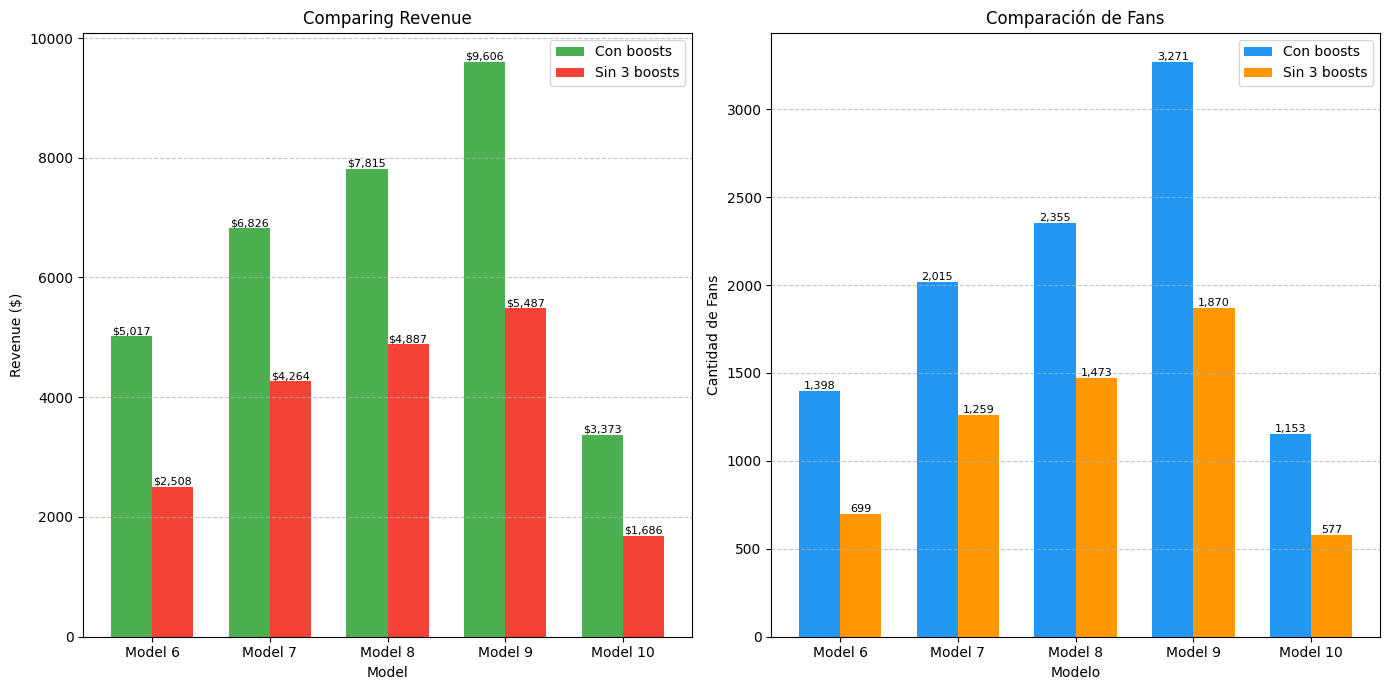


Summary:
Total Revenue (Current): $32,638.59
Revenue without 3 boosts: $18,831.48
Difference: -$13,807.11 (42.3%)

Total Fans (Current): 10,192
Fans without 3 boosts: 5,878
Difference: -4,314 (42.3%)


In [12]:
##########################################################################################################
# IMPACT OF DROPPING BOOSTERS
##########################################################################################################

print(df.columns.to_list())

#rename column to 'MODEL' for consistency
df.rename(columns={'MODEL ': 'MODEL'}, inplace=True)

def compare_boost_scenarios():
    """Comparison between models with and without boosts"""
    models = [6, 7, 8, 9, 10]
    model_data = df[df['MODEL'].str.extract(r'(\d+)')[0].astype(int).isin(models)].copy()
    
    # Metrics with boosts
    model_data['Current Revenue'] = model_data['REVENUE']
    model_data['Current Fans'] = model_data['TOTAL COUNT OF SUBSCRIBER']
    
    # Metrics without 3 boosts
    model_data['Fans Lost'] = model_data['AVE SUBS COUNT'] * 3
    model_data['Revenue Lost'] = model_data['Fans Lost'] * model_data['$ per fan']
    model_data['Reduced Revenue'] = model_data['Current Revenue'] - model_data['Revenue Lost']
    model_data['Reduced Fans'] = model_data['Current Fans'] - model_data['Fans Lost']
    
    # Chart setup
    plt.figure(figsize=(14, 7))
    
    bar_width = 0.35
    index = np.arange(len(model_data))
    
    # Revenue bar chart
    plt.subplot(1, 2, 1)
    bars1 = plt.bar(index, model_data['Current Revenue'], bar_width, label='Con boosts', color='#4CAF50')
    bars2 = plt.bar(index + bar_width, model_data['Reduced Revenue'], bar_width, label='Sin 3 boosts', color='#F44336')
    
    plt.title('Comparing Revenue')
    plt.xlabel('Model')
    plt.ylabel('Revenue ($)')
    plt.xticks(index + bar_width/2, model_data['MODEL'])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}',
                    ha='center', va='bottom', fontsize=8)
    
    # Fans bar chart
    plt.subplot(1, 2, 2)
    bars1 = plt.bar(index, model_data['Current Fans'], bar_width, label='Con boosts', color='#2196F3')
    bars2 = plt.bar(index + bar_width, model_data['Reduced Fans'], bar_width, label='Sin 3 boosts', color='#FF9800')
    
    plt.title('Comparación de Fans')
    plt.xlabel('Modelo')
    plt.ylabel('Cantidad de Fans')
    plt.xticks(index + bar_width/2, model_data['MODEL'])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}',
                    ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Totals
    total_current_rev = model_data['Current Revenue'].sum()
    total_reduced_rev = model_data['Reduced Revenue'].sum()
    total_current_fans = model_data['Current Fans'].sum()
    total_reduced_fans = model_data['Reduced Fans'].sum()
    
    print("\nSummary:")
    print(f"Total Revenue (Current): ${total_current_rev:,.2f}")
    print(f"Revenue without 3 boosts: ${total_reduced_rev:,.2f}")
    print(f"Difference: -${total_current_rev - total_reduced_rev:,.2f} ({((total_current_rev - total_reduced_rev)/total_current_rev)*100:.1f}%)")
    
    print(f"\nTotal Fans (Current): {total_current_fans:,.0f}")
    print(f"Fans without 3 boosts: {total_reduced_fans:,.0f}")
    print(f"Difference: -{total_current_fans - total_reduced_fans:,.0f} ({((total_current_fans - total_reduced_fans)/total_current_fans)*100:.1f}%)")

compare_boost_scenarios()

Boots are necessary for the operation of models 6 to 10, revenue and fans could decrease 42.3% respectively.

### 4.2. Improving Model 19

Key factors to analyze: Content quality and type, Boost frequency and timing, Target audience segmentation, Pricing strategy, Fan retention, Cross-promotion with other models.

In [14]:
#############################################################################################################################################
# IMPROVING MODEL 19
#############################################################################################################################################


def analyze_model_19():
    """Analyzes Model 19 and suggests improvements"""
    model_19 = df[df['MODEL'] == 'Model 19'].iloc[0]
    agency = model_19['Agency']
    avg_per_fan = model_19['$ per fan']
    
    # Compare with other models from the same agency
    agency_models = df[df['Agency'] == agency]
    agency_avg = agency_models['$ per fan'].mean()
    
    # Find similar models (same BOOST COUNT range)
    boost_range = (model_19['BOOST COUNT']-1, model_19['BOOST COUNT']+1)
    similar_models = df[df['BOOST COUNT'].between(*boost_range)]
    
    print(f"\nAnalysis for Model 19 (${avg_per_fan:.2f} per fan):")
    print(f"- Agency: {agency} (average: ${agency_avg:.2f} per fan)")
    print(f"- Total fans: {model_19['TOTAL COUNT OF SUBSCRIBER']}")
    print(f"- Fans per boost: {model_19['AVE SUBS COUNT']}")
    
    # Key factors to analyze
    print("\nKey factors to analyze:")
    factors = [
        "Content quality and type",
        "Boost frequency and timing",
        "Target audience segmentation",
        "Pricing strategy",
        "Fan retention",
        "Cross-promotion with other models"
    ]
    for i, factor in enumerate(factors, 1):
        print(f"{i}. {factor}")
    
    # Recommendations based on top-performing similar models
    top_similar = similar_models[similar_models['$ per fan'] > 3].sort_values('$ per fan', ascending=False)
    
    if not top_similar.empty:
        print("\nTop-performing similar models:")
        print(top_similar[['MODEL', '$ per fan', 'AVE SUBS COUNT']].to_string(index=False))
        
        print("\nRecommendations:")
        recs = [
            f"Optimize timing (best average time: {top_similar['AVE SUBS COUNT'].mean():.0f} fans/boost)",
            "Analyze content from top models: " + ", ".join(top_similar['MODEL'].head(3).tolist()),
            "Target audience similar to high $/fan models",
            "A/B testing with different pricing strategies"
        ]
        for i, rec in enumerate(recs, 1):
            print(f"{i}. {rec}")
    else:
        print("\nNo better-performing similar models found for comparison.")

# Execute the function
analyze_model_19()


Analysis for Model 19 ($1.72 per fan):
- Agency: R (average: $2.93 per fan)
- Total fans: 1325
- Fans per boost: 221

Key factors to analyze:
1. Content quality and type
2. Boost frequency and timing
3. Target audience segmentation
4. Pricing strategy
5. Fan retention
6. Cross-promotion with other models

Top-performing similar models:
   MODEL  $ per fan  AVE SUBS COUNT
Model 20       6.64             410
 Model 5       5.21             432
Model 21       4.93             471
Model 22       4.93             365
Model 23       3.80             258
 Model 6       3.59             233
Model 24       3.54             382
 Model 8       3.32             294
 Model 1       3.23             229
Model 25       3.19             304

Recommendations:
1. Optimize timing (best average time: 338 fans/boost)
2. Analyze content from top models: Model 20, Model 5, Model 21
3. Target audience similar to high $/fan models
4. A/B testing with different pricing strategies


### 4.3. Analysis of Cost Per Acquisition (CPA) by Model

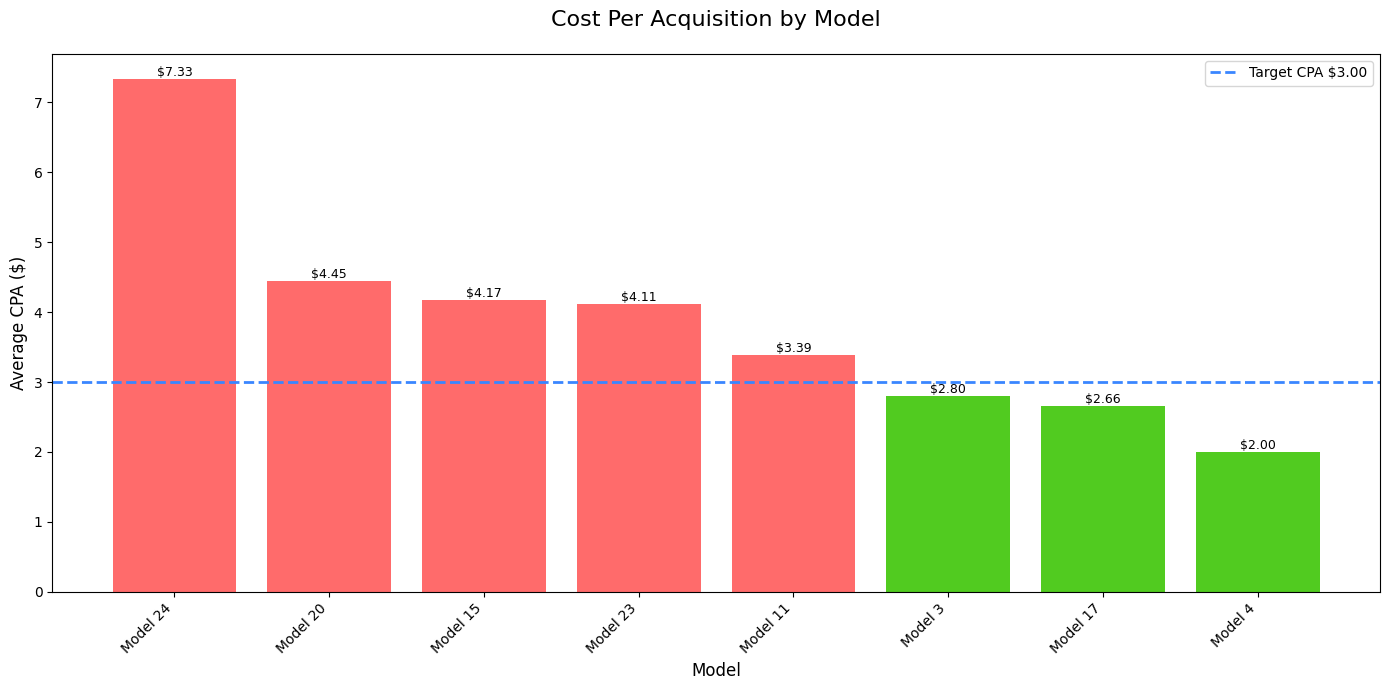


=============== AUTOMATED CAMPAIGN OPTIMIZATION RECOMMENDATIONS ================


XXX HIGH CPA MODELS (NEED OPTIMIZATION):


  MODEL: Model 24
   • Current CPA: $7.33 (Spent: $1,840, Subs: 251)
   • Campaigns run: 7

    TOP PERFORMING COMBINATIONS:
     • AM 44: CPA $4.69 (Spent: $150, Subs: 32)
     • AM 50: CPA $5.56 (Spent: $150, Subs: 27)
     • AM 34: CPA $6.15 (Spent: $240, Subs: 39)

    WORST PERFORMING COMBINATIONS:
     • AM 26: CPA $7.69 (Spent: $300, Subs: 39)
     • AM 36: CPA $8.11 (Spent: $300, Subs: 37)
     • AM 47: CPA $23.08 (Spent: $300, Subs: 13)

    RECOMMENDED ACTIONS:
     1. REDUCE spending on AM 47 (CPA $23.08)
     2. REALLOCATE $150 from worst combo to best combo (AM 44)
     3. TEST 2 new ASSIST/MODEL variations to find better performers
     4. If CPA remains high, consider PAUSING this model temporarily

  MODEL: Model 20
   • Current CPA: $4.45 (Spent: $2,590, Subs: 582)
   • Campaigns run: 9

    TOP PERFORMING COMBINATIONS:
     • AM 28: CPA $1.95 

In [27]:
#############################################################################################################################################
# ANALYSIS OF COST PER ACQUISITION (CPA) BY MODEL
#############################################################################################################################################

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/ringoquimico/Proyectos/refs/heads/main/AM3%20TEST/01_test_B/00_data_sources/promo_raw.csv", sep=';', decimal=',', thousands='.')

def analyze_campaigns():
   
    # Data cleaning
    df['SPENT'] = df['SPENT'].replace('[\$,]', '', regex=True).astype(float)
    df['REVENUE'] = df['REVENUE'].replace('[\$,]', '', regex=True).astype(float)
    df['SUBS'] = pd.to_numeric(df['SUBS'], errors='coerce')
    df['CPA'] = np.where(df['SUBS'] > 0, df['SPENT']/df['SUBS'], np.nan)
    
    # Filter relevant data
    paid_complete = df[(df['STATUS'] == 'COMPLETE') & 
                      (df['PROMO TYPE'] != 'FREE DM') & 
                      (df['SPENT'] > 0)].copy()
    
    # Calculate model performance
    cpa_by_model = paid_complete.groupby('MODEL').agg(
        Total_Spent=('SPENT', 'sum'),
        Total_Subs=('SUBS', 'sum'),
        Avg_CPA=('CPA', 'mean'),
        Campaign_Count=('MODEL', 'count')
    ).reset_index()
    
    cpa_by_model['Avg_CPA'] = cpa_by_model['Total_Spent'] / cpa_by_model['Total_Subs']
    cpa_by_model = cpa_by_model.sort_values('Avg_CPA', ascending=False)
    
    # Identify performance categories
    high_cpa = cpa_by_model[cpa_by_model['Avg_CPA'] > 3.0]
    good_cpa = cpa_by_model[cpa_by_model['Avg_CPA'] <= 3.0]
    
    # Visualization
    plt.figure(figsize=(14, 7))
    colors = np.where(cpa_by_model['Avg_CPA'] > 3, '#FF6B6B', '#51CB20')
    bars = plt.bar(cpa_by_model['MODEL'], cpa_by_model['Avg_CPA'], color=colors)
    
    plt.axhline(y=3, color='#3A86FF', linestyle='--', linewidth=2, label='Target CPA $3.00')
    plt.title('Cost Per Acquisition by Model', fontsize=16, pad=20)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Average CPA ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.2f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Generate detailed recommendations
    print("\n" + "="*80)
    print(" AUTOMATED CAMPAIGN OPTIMIZATION RECOMMENDATIONS ".center(80, '='))
    print("="*80 + "\n")
    
    # High CPA models analysis
    print("\nXXX HIGH CPA MODELS (NEED OPTIMIZATION):\n")
    for _, row in high_cpa.iterrows():
        model_data = paid_complete[paid_complete['MODEL'] == row['MODEL']]
        
        # Get top 3 and bottom 3 combinations
        combos = model_data.groupby('ASSIST/MODEL').agg(
            Combo_CPA=('CPA', 'mean'),
            Combo_Spent=('SPENT', 'sum'),
            Combo_Subs=('SUBS', 'sum')
        ).sort_values('Combo_CPA')
        
        top_combos = combos.head(3)
        worst_combos = combos.tail(3)
        
        # Model summary
        print(f"\n  MODEL: {row['MODEL']}")
        print(f"   • Current CPA: ${row['Avg_CPA']:.2f} (Spent: ${row['Total_Spent']:,.0f}, Subs: {row['Total_Subs']:,.0f})")
        print(f"   • Campaigns run: {row['Campaign_Count']}")
        
        # Top performing combos
        print("\n    TOP PERFORMING COMBINATIONS:")
        for combo, data in top_combos.iterrows():
            print(f"     • {combo}: CPA ${data['Combo_CPA']:.2f} (Spent: ${data['Combo_Spent']:,.0f}, Subs: {data['Combo_Subs']:,.0f})")
        
        # Worst performing combos
        print("\n    WORST PERFORMING COMBINATIONS:")
        for combo, data in worst_combos.iterrows():
            print(f"     • {combo}: CPA ${data['Combo_CPA']:.2f} (Spent: ${data['Combo_Spent']:,.0f}, Subs: {data['Combo_Subs']:,.0f})")
        
        # Recommendation logic
        worst_combo = worst_combos.iloc[-1]
        best_combo = top_combos.iloc[0]
        
        print("\n    RECOMMENDED ACTIONS:")
        print(f"     1. REDUCE spending on {worst_combos.index[-1]} (CPA ${worst_combo['Combo_CPA']:.2f})")
        print(f"     2. REALLOCATE ${worst_combo['Combo_Spent']*0.5:,.0f} from worst combo to best combo ({top_combos.index[0]})")
        print(f"     3. TEST 2 new ASSIST/MODEL variations to find better performers")
        print(f"     4. If CPA remains high, consider PAUSING this model temporarily")
    
    # Good CPA models analysis
    print("\n\n WELL-PERFORMING MODELS (MAINTAIN/SCALE):\n")
    for _, row in good_cpa.iterrows():
        model_data = paid_complete[paid_complete['MODEL'] == row['MODEL']]
        combos = model_data.groupby('ASSIST/MODEL').agg(
            Combo_CPA=('CPA', 'mean'),
            Combo_Spent=('SPENT', 'sum'),
            Combo_Subs=('SUBS', 'sum')
        ).sort_values('Combo_CPA')
        
        print(f"\n MODEL: {row['MODEL']}")
        print(f"   • Current CPA: ${row['Avg_CPA']:.2f} (Spent: ${row['Total_Spent']:,.0f}, Subs: {row['Total_Subs']:,.0f})")
        
        # Find most scalable combo
        best_scalable = combos[(combos['Combo_Subs'] > 50) & 
                             (combos['Combo_CPA'] < 2.5)].sort_values('Combo_CPA')
        
        if not best_scalable.empty:
            best = best_scalable.iloc[0]
            print("\n    BEST OPPORTUNITY TO SCALE:")
            print(f"     • {best_scalable.index[0]}: CPA ${best['Combo_CPA']:.2f} (Spent: ${best['Combo_Spent']:,.0f}, Subs: {best['Combo_Subs']:,.0f})")
            print(f"\n    RECOMMENDED ACTIONS:")
            print(f"     1. INCREASE budget for {best_scalable.index[0]} by 30-50%")
            print(f"     2. MONITOR CPA closely during scaling")
            print(f"     3. TEST similar ASSIST/MODEL variations")
        else:
            print("\n   ℹ️ No clear scaling opportunity found - maintain current strategy")
    
    # General recommendations
    print("\n" + "="*80)
    print(" GENERAL OPTIMIZATION STRATEGIES ".center(80, '='))
    print("="*80)
    print("\n1. Budget Reallocation:")
    print("   - Shift 20-30% of budget from worst performers to best performers")
    print("\n2. Testing Framework:")
    print("   - Run A/B tests on: ASSIST/MODEL combos, ad creatives, targeting")
    print("\n3. Performance Monitoring:")
    print("   - Set up weekly CPA review meetings for high-spend models")
    print("\n4. Creative Optimization:")
    print("   - Refresh creatives for models with CPA > $4.00")
    print("\n5. Lookalike Audiences:")
    print("   - Create lookalike audiences from best converting combos")

# Run the analysis
analyze_campaigns()
